In [3]:
import pandas as pd
import openml
import pandas_profiling
import numpy as np
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

# Intro

In this notebook I define ML pipelines for two datasets. For both datases I'm using a RandomForest classifier to classify target variables.

First dataset is "credit-g" which contains 20 features (13 categorical, 7 numeric) describing someones credid applications. The target variable is either 'good' or 'bad' denoting the status of credit situation of the applicant. 

The data is in perfect shape with no visible data errors.

In [35]:
df = pd.read_csv('./credit-g.csv')
#profile = pandas_profiling.ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
#profile.to_widgets()

In [33]:
np.random.seed(0)

X, y = fetch_openml("credit-g", version=1, as_frame=True, return_X_y=True)
# Alternatively X and y can be obtained directly from the frame attribute:
# X = titanic.frame.drop('survived', axis=1)
# y = titanic.frame['survived']
X.shape,y.shape

((1000, 20), (1000,))

In [29]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = X.select_dtypes(include="number").columns.to_list()#['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = X.select_dtypes(include="object").columns.to_list()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
rfc = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=200))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

model score: 0.705


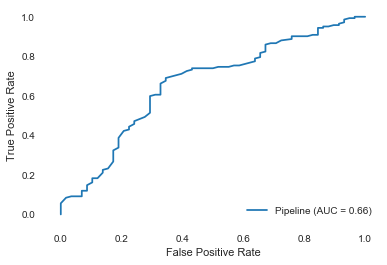

In [30]:
# Test on clean data 
print("model score: %.3f" % rfc.score(X_test, y_test))
rfc_disp = plot_roc_curve(rfc, X_test, y_test)

In [31]:
# Load data from https://www.openml.org/d/40945
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
profile = pandas_profiling.ProfileReport(X, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_widgets()

In [40]:
np.random.seed(0)

X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.790


## Data Corrupition

Now once we have a pipeline and a fitted model, we need to generate diffrent test sets out of X_test by corruption the data and evaluation the performance. I decided to focus first on typos which are quite common data quality error.
Based on the literature we can define a few kinds of erros :

##### Double character typos
Typos based on hitting an intended key twice (like "cooding" instead of "coding").

##### Transposed character typos
Typos based on transposition errors (like "ocding" instead of "coding").

##### Missed character typos
Typos based on a missed key (like "oding" instead of "coding").

##### Wrong key typos
Typos based on a user hitting the wrong key that is near the intended key (like "voding" instead of "coding"), only uses characters valid in ascii domain names.

In [5]:
import nlpaug.augmenter.char as nac

swapRandom = nac.RandomCharAug(action="swap")
replaceTwoCharsBasedOnKeyboard = nac.KeyboardAug()
deleteRandomChar = nac.RandomCharAug(action="delete")


text = "quick"
print(swapRandom.augment(text))
print(replaceTwoCharsBasedOnKeyboard.augment(text))
print(deleteRandomChar.augment(text))


#def corrupt_row(df):
    

uqick
@uick
quic


In [62]:
X_test.select_dtypes(include='object')


X_test.apply(lambda x: print(x),axis=0,)

3.0
2.0
2.0
3.0
2.0
3.0
1.0
1.0
2.0
3.0
2.0
3.0
2.0
3.0
1.0
2.0
2.0
1.0
1.0
3.0
3.0
3.0
3.0
1.0
3.0
2.0
2.0
3.0
3.0
3.0
3.0
1.0
2.0
1.0
1.0
3.0
3.0
1.0
3.0
3.0
3.0
2.0
1.0
2.0
3.0
3.0
3.0
1.0
3.0
3.0
2.0
3.0
3.0
3.0
3.0
3.0
1.0
3.0
3.0
2.0
3.0
1.0
3.0
3.0
3.0
2.0
2.0
3.0
3.0
3.0
2.0
3.0
1.0
3.0
3.0
1.0
2.0
1.0
3.0
3.0
1.0
3.0
2.0
1.0
3.0
1.0
2.0
3.0
2.0
3.0
3.0
3.0
3.0
3.0
3.0
1.0
3.0
3.0
2.0
1.0
2.0
3.0
3.0
3.0
3.0
2.0
1.0
3.0
3.0
1.0
1.0
1.0
2.0
1.0
3.0
2.0
2.0
1.0
2.0
2.0
1.0
3.0
1.0
1.0
3.0
3.0
3.0
3.0
3.0
2.0
3.0
1.0
2.0
1.0
1.0
3.0
2.0
3.0
3.0
3.0
2.0
1.0
3.0
3.0
1.0
1.0
3.0
3.0
2.0
1.0
3.0
1.0
2.0
2.0
3.0
3.0
1.0
1.0
3.0
3.0
3.0
1.0
2.0
1.0
3.0
3.0
3.0
3.0
3.0
3.0
2.0
1.0
3.0
3.0
1.0
2.0
3.0
1.0
2.0
1.0
1.0
3.0
3.0
2.0
2.0
3.0
1.0
3.0
2.0
3.0
1.0
3.0
1.0
1.0
1.0
3.0
2.0
2.0
3.0
2.0
2.0
3.0
3.0
1.0
1.0
3.0
2.0
3.0
3.0
3.0
3.0
1.0
2.0
3.0
2.0
2.0
2.0
3.0
2.0
3.0
1.0
3.0
2.0
1.0
2.0
3.0
3.0
2.0
3.0
3.0
2.0
1.0
3.0
3.0
3.0
3.0
3.0
2.0
3.0
3.0
3.0
3.0
3.0
2.0
3.0
3.0
1.0
1.0
3.0
3.0


61.3792
15.1
7.75
7.8958
6.975
17.4
15.0333
7.8958
27.7208
10.5
110.8833
30.0
7.8958
9.6875
7.6292
7.05
8.1375
73.5
79.2
8.4333
8.05
49.5042
30.5
19.2583
7.8958
41.5792
26.55
21.075
75.25
10.5
26.25
7.8958
7.2292
78.85
57.0
7.225
7.2292
7.8292
25.5875
15.0458
63.3583
7.7417
8.5167
7.75
0.0
7.925
8.05
10.7083
42.5
7.7792
9.5
51.4792
12.35
8.05
60.0
23.0
91.0792
512.3292
7.75
29.125
26.0
13.0
14.4542
59.4
7.2292
13.0
9.2167
27.7208
31.275
82.1708
164.8667
26.2875
22.3583
26.25
26.0
9.225
26.0
73.5
8.05
8.05
146.5208
211.5
7.775
21.0
31.3875
7.8958
8.05
7.8792
35.5
13.0
8.05
33.0
13.0
26.0
8.05
30.0708
7.05
66.6
13.9
30.0708
134.5
39.0
15.55
15.5
26.0
22.025
7.225
29.0
26.55
7.25
8.6625
9.225
14.4542
7.7208
10.5
7.25
15.9
7.2292
7.925
15.1
13.0
7.8208
20.575
26.0
26.55
15.7417
29.125
7.25
8.05
29.0
7.875
512.3292
7.225
15.2458
8.05
7.8958
13.0
13.0
8.05
None
None
None
None
None
G6
E12
C104
None
None
None
None
None
None
B57 B59 B63 B66
None
None
A31
None
None
None
None
None
B96 B98
None
No

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1139,None,None,None,None,None,None,None,None,None,None,None,None,None
533,None,None,None,None,None,None,None,None,None,None,None,None,None
459,None,None,None,None,None,None,None,None,None,None,None,None,None
1150,None,None,None,None,None,None,None,None,None,None,None,None,None
393,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,None,None,None,None,None,None,None,None,None,None,None,None,None
1052,None,None,None,None,None,None,None,None,None,None,None,None,None
426,None,None,None,None,None,None,None,None,None,None,None,None,None
554,None,None,None,None,None,None,None,None,None,None,None,None,None


In [61]:
class DataCorrupter:
    def __init__(dataset):
        self.data= dataset
        self.columns = dataset.columns.to_list()
        pass
    
    
    def get_corrupted_data():
        pass
    
    def _corrupt_cardinal_row(row):
        pass